***OBJECTIVE:  
The objective of this project is to apply clustering algorithms on the Iris dataset to identify patterns and group the data points 
into clusters based on their features.***

***<span style="font-size:24px;">1. Loading and Preprocessing</span>***

In [28]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns

Import dataset

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
target_names= iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
x.shape

(150, 4)

In [8]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

***Find null alues in data***

In [10]:
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

***Search for duplicate data***

In [11]:
x.duplicated().sum()

1

***Remove the duplicate data***

In [12]:
x.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
x.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

***The skewness values for all features are within an acceptable range, meaning that no significant transformations are needed.***

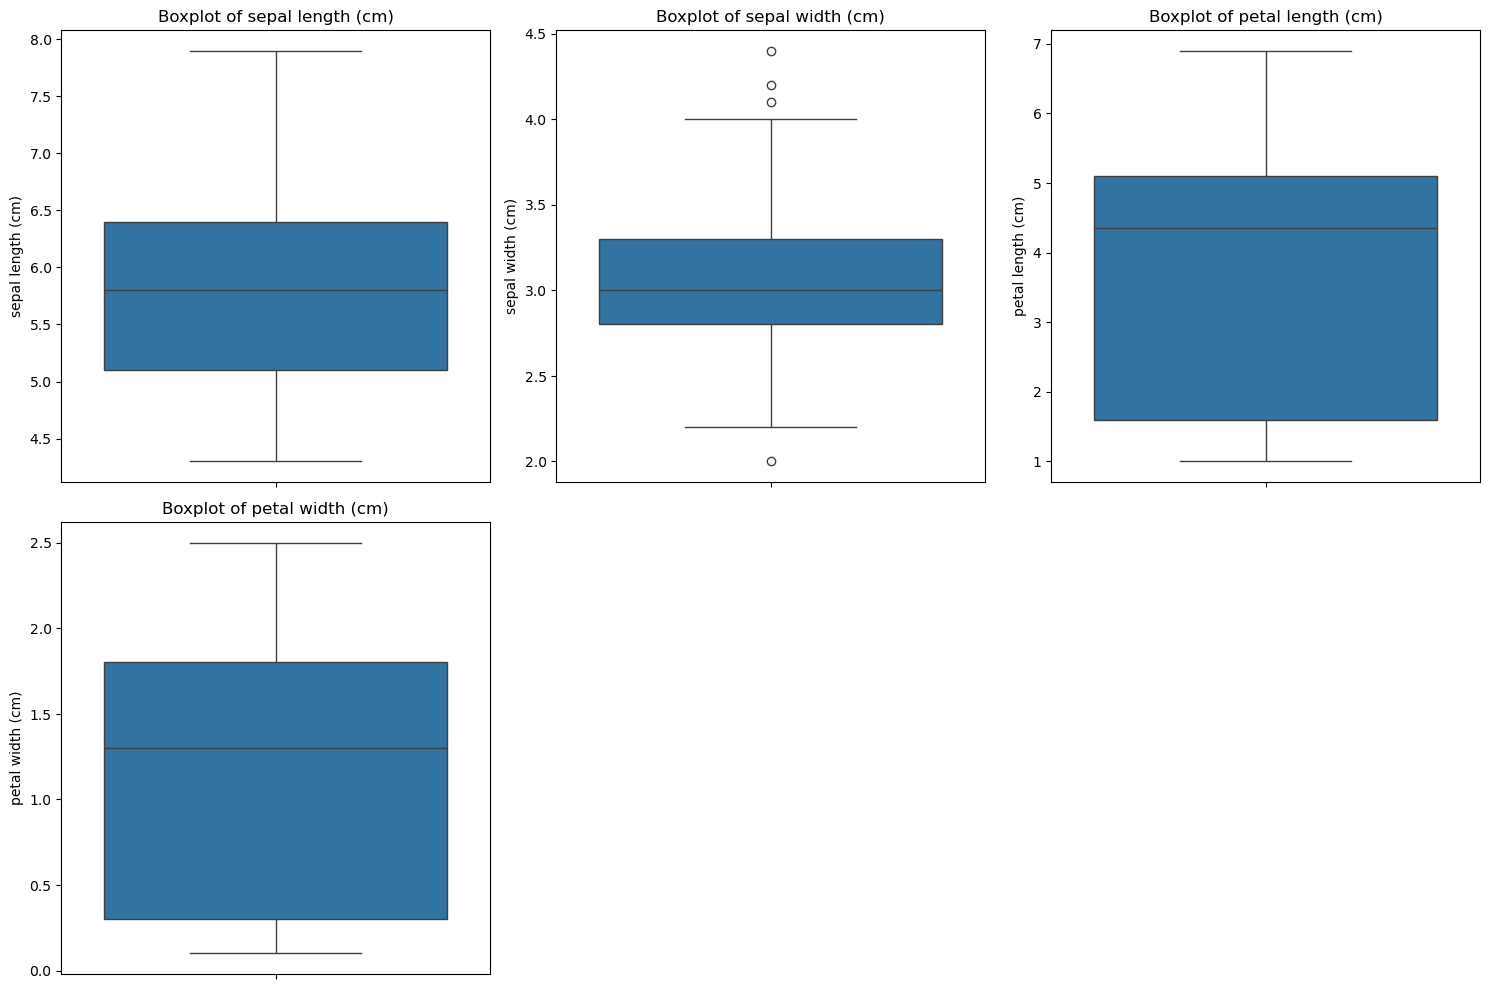

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_names):
    plt.subplot((len(feature_names) + 2) // 3, 3, i + 1)
    sns.boxplot(x[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

***Plotted the boxplot to check for outliers, but it shows that there are no outliers in the data.***

***<span style="font-size:24px;">2.Clustering Algorithm Implementation</span>***

***<span style="font-size:20px;">A) KMeans Clustering </span>***

***How K-Means Clustering Works:***
K-Means is an unsupervised algorithm that groups data points into a predefined number of clusters (k). It starts by randomly initializing cluster 
centroids, assigns each data point to the nearest centroid, and then recalculates centroids based on the mean of assigned points. 
This process repeats until the centroids stabilize or a set number of iterations is reached, aiming to minimize intra-cluster variance.

***Why K-Means is Suitable for the Iris Dataset:***
The Iris dataset has three naturally distinct species, aligning well with K-Means' clustering approach. With numerical features and clear separability 
between classes, K-Means can effectively identify patterns in the data. Additionally, the dataset is small and clean, making it computationally 
efficient for clustering analysis.

In [23]:
from sklearn.cluster import KMeans

***Since we dont know the number of clsters lets do Elbow method***

***ELBOW METHOD: To find the number of clusters***

In [29]:
sse = [] 
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)    
    sse.append(km.inertia_)      

C:\Users\Shani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

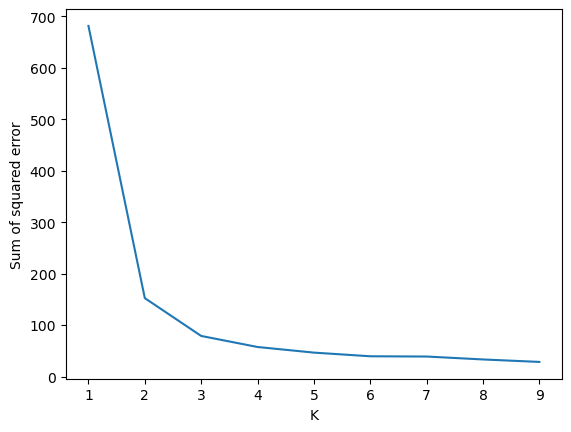

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

***From this graph we can see that the number of clusters =3***

In [32]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(x)                                                     
y_predicted

C:\Users\Shani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

**To see the clustr corresponding to each data**

In [34]:
x['cluster']=y_predicted
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
km.inertia_   

78.85144142614601

In [36]:
km.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

**Centroid of cluster**

In [38]:
km.cluster_centers_  

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

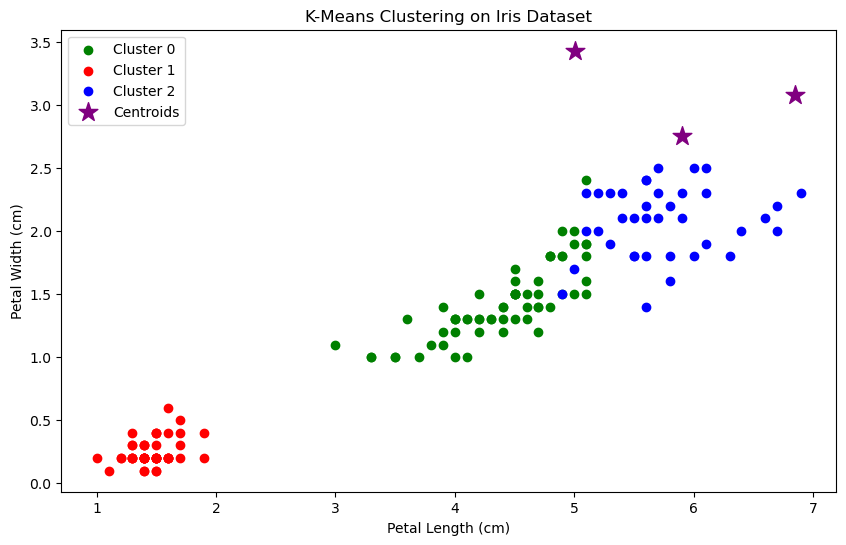

In [41]:
x1 = x[x.cluster==0]
x2 = x[x.cluster==1]
x3 = x[x.cluster==2]
plt.figure(figsize=(10, 6))
plt.scatter(x1['petal length (cm)'], x1['petal width (cm)'], color='green', label='Cluster 0')
plt.scatter(x2['petal length (cm)'], x2['petal width (cm)'], color='red', label='Cluster 1')
plt.scatter(x3['petal length (cm)'], x3['petal width (cm)'], color='blue', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            color='purple', marker='*', s=200, label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

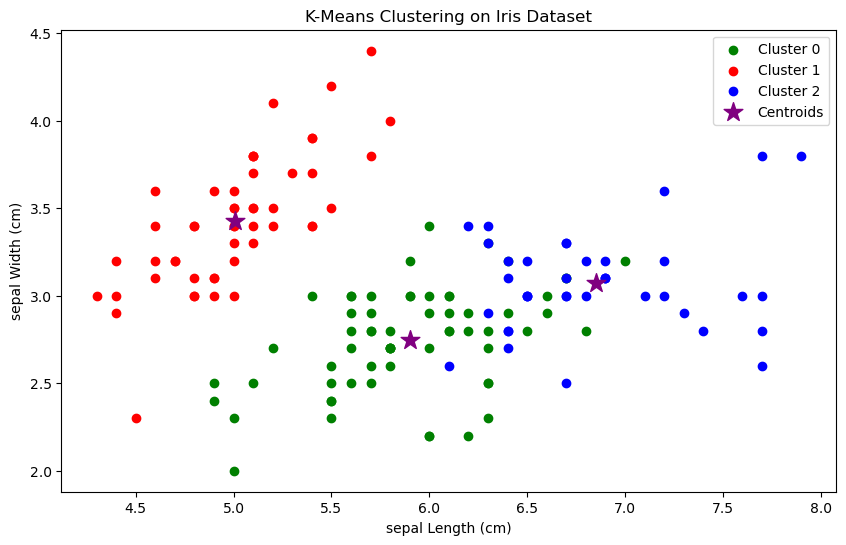

In [42]:
x1 = x[x.cluster==0]
x2 = x[x.cluster==1]
x3 = x[x.cluster==2]
plt.figure(figsize=(10, 6))
plt.scatter(x1['sepal length (cm)'], x1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(x2['sepal length (cm)'], x2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(x3['sepal length (cm)'], x3['sepal width (cm)'], color='blue', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            color='purple', marker='*', s=200, label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('sepal Length (cm)')
plt.ylabel('sepal Width (cm)')
plt.legend()
plt.show()

***Silhouette Score:***

In [43]:
#Silhouette Score, which evaluates the quality of clustering by measuring how similar each point is to its own cluster compared to other clusters.
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(x,y_predicted )
silhouette_avg 

0.6851559988597147

The Silhouette Score measures how well data points fit within their assigned clusters and how distinctly they are separated from other clusters. 
It ranges from -1 to +1, where +1 indicates well-defined and separated clusters, 
0 suggests overlapping clusters, and -1 indicates incorrect clustering.

***<span style="font-size:20px;">B) Hierarchical Clustering</span>***

Hierarchical Clustering builds a hierarchy of clusters either by starting with individual data points and merging them (agglomerative) or by starting 
with one large cluster and splitting it (divisive). The most common method is agglomerative clustering, where each point begins as its own cluster, 
and pairs of clusters are merged based on their similarity until one cluster remains. This process is often visualized using a dendrogram, which helps 
determine the optimal number of clusters by analyzing where significant merges occur.

***Why Hierarchical clustering might be suitable for the Iris dataset.***
Hierarchical clustering is suitable for the Iris dataset because it does not require specifying the number of clusters in advance, and the dataset is
relatively small and well-structured. The dendrogram provides an intuitive way to explore the natural grouping of data points, making it easier to 
understand the relationships between different species of flowers.

In [44]:
import scipy.cluster.hierarchy as sch

***DENDROGRAM***

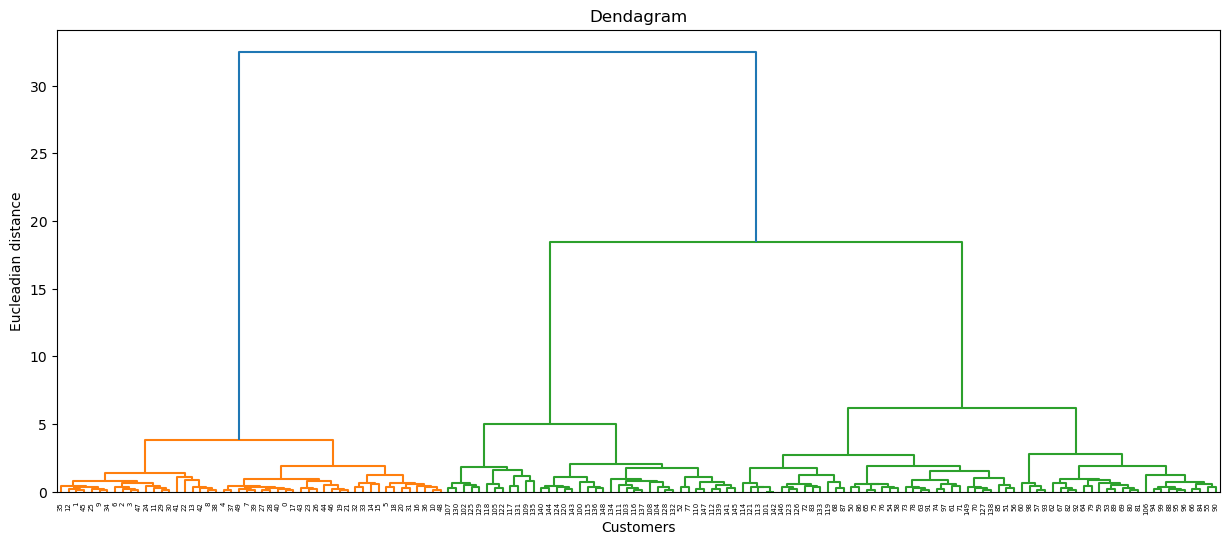

In [45]:
plt.figure(figsize=(15,6))
plt.title("Dendagram")
plt.xlabel("Customers")
plt.ylabel("Eucleadian distance")
dendagram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.show()

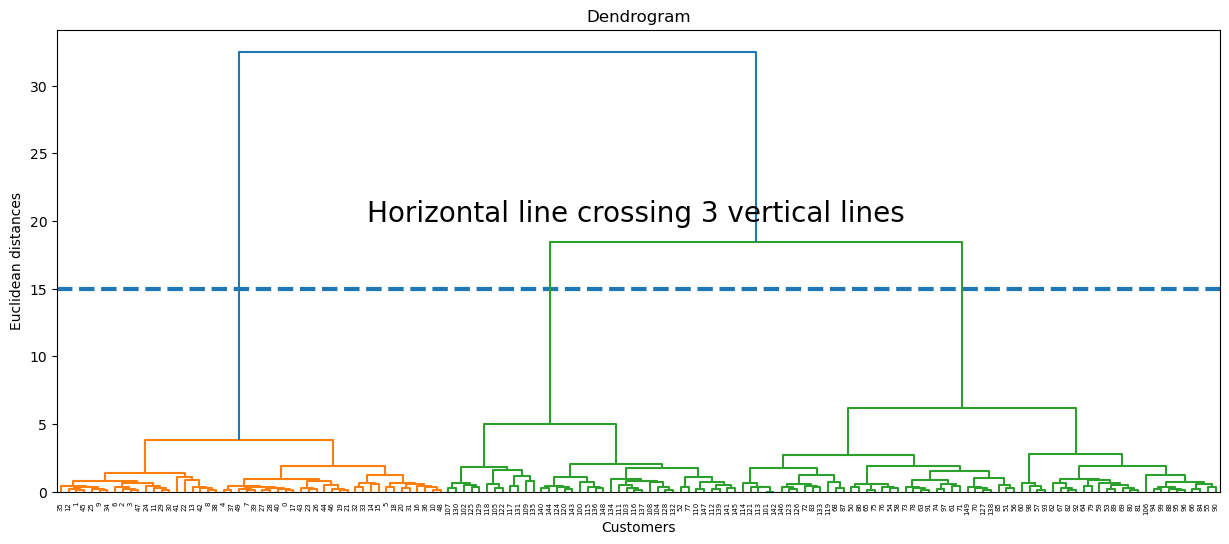

In [55]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=15,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=400,y=20,s='Horizontal line crossing 3 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering as AC

In [62]:
hc=AC(n_clusters=3,linkage="ward")
y_hc=hc.fit_predict(x)

In [64]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

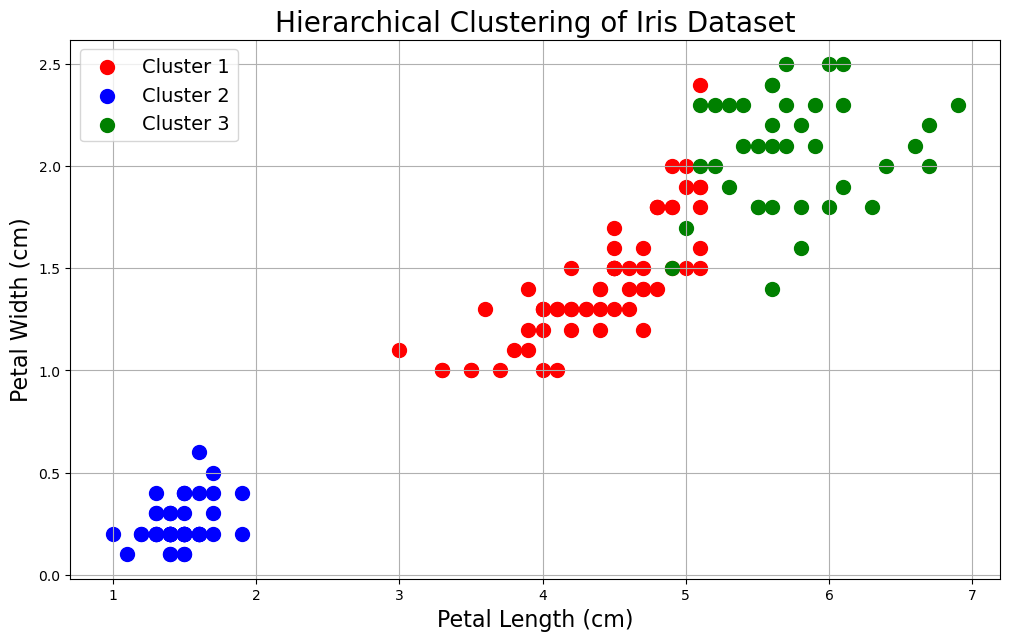

In [63]:
plt.figure(figsize=(12, 7))
plt.scatter(x.iloc[y_hc == 0, 2], x.iloc[y_hc == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(x.iloc[y_hc == 1, 2], x.iloc[y_hc == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(x.iloc[y_hc == 2, 2], x.iloc[y_hc == 2, 3], s=100, c='green', label='Cluster 3')

# Plotting cluster centroids is not applicable in Hierarchical Clustering
plt.title('Hierarchical Clustering of Iris Dataset', fontsize=20)
plt.xlabel('Petal Length (cm)', fontsize=16)
plt.ylabel('Petal Width (cm)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

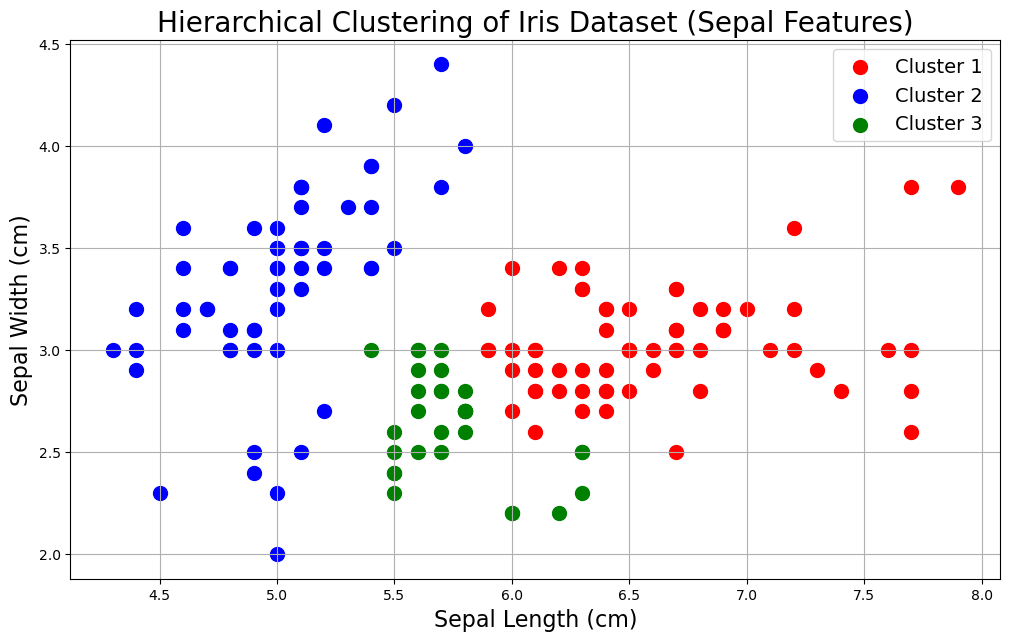

In [67]:
x_sepal = x.iloc[:, :2]  

# Perform Hierarchical Clustering
hc = AC(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(x_sepal)

# Plot the clusters
plt.figure(figsize=(12, 7))
plt.scatter(x_sepal.iloc[y_hc == 0, 0], x_sepal.iloc[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x_sepal.iloc[y_hc == 1, 0], x_sepal.iloc[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x_sepal.iloc[y_hc == 2, 0], x_sepal.iloc[y_hc == 2, 1], s=100, c='green', label='Cluster 3')

plt.title('Hierarchical Clustering of Iris Dataset (Sepal Features)', fontsize=20)
plt.xlabel('Sepal Length (cm)', fontsize=16)
plt.ylabel('Sepal Width (cm)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()